In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

sns.set();
warnings.filterwarnings('ignore', category=FutureWarning)

In [22]:
df = pd.read_csv("diabetes.csv", sep=",")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
target = "Outcome"

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


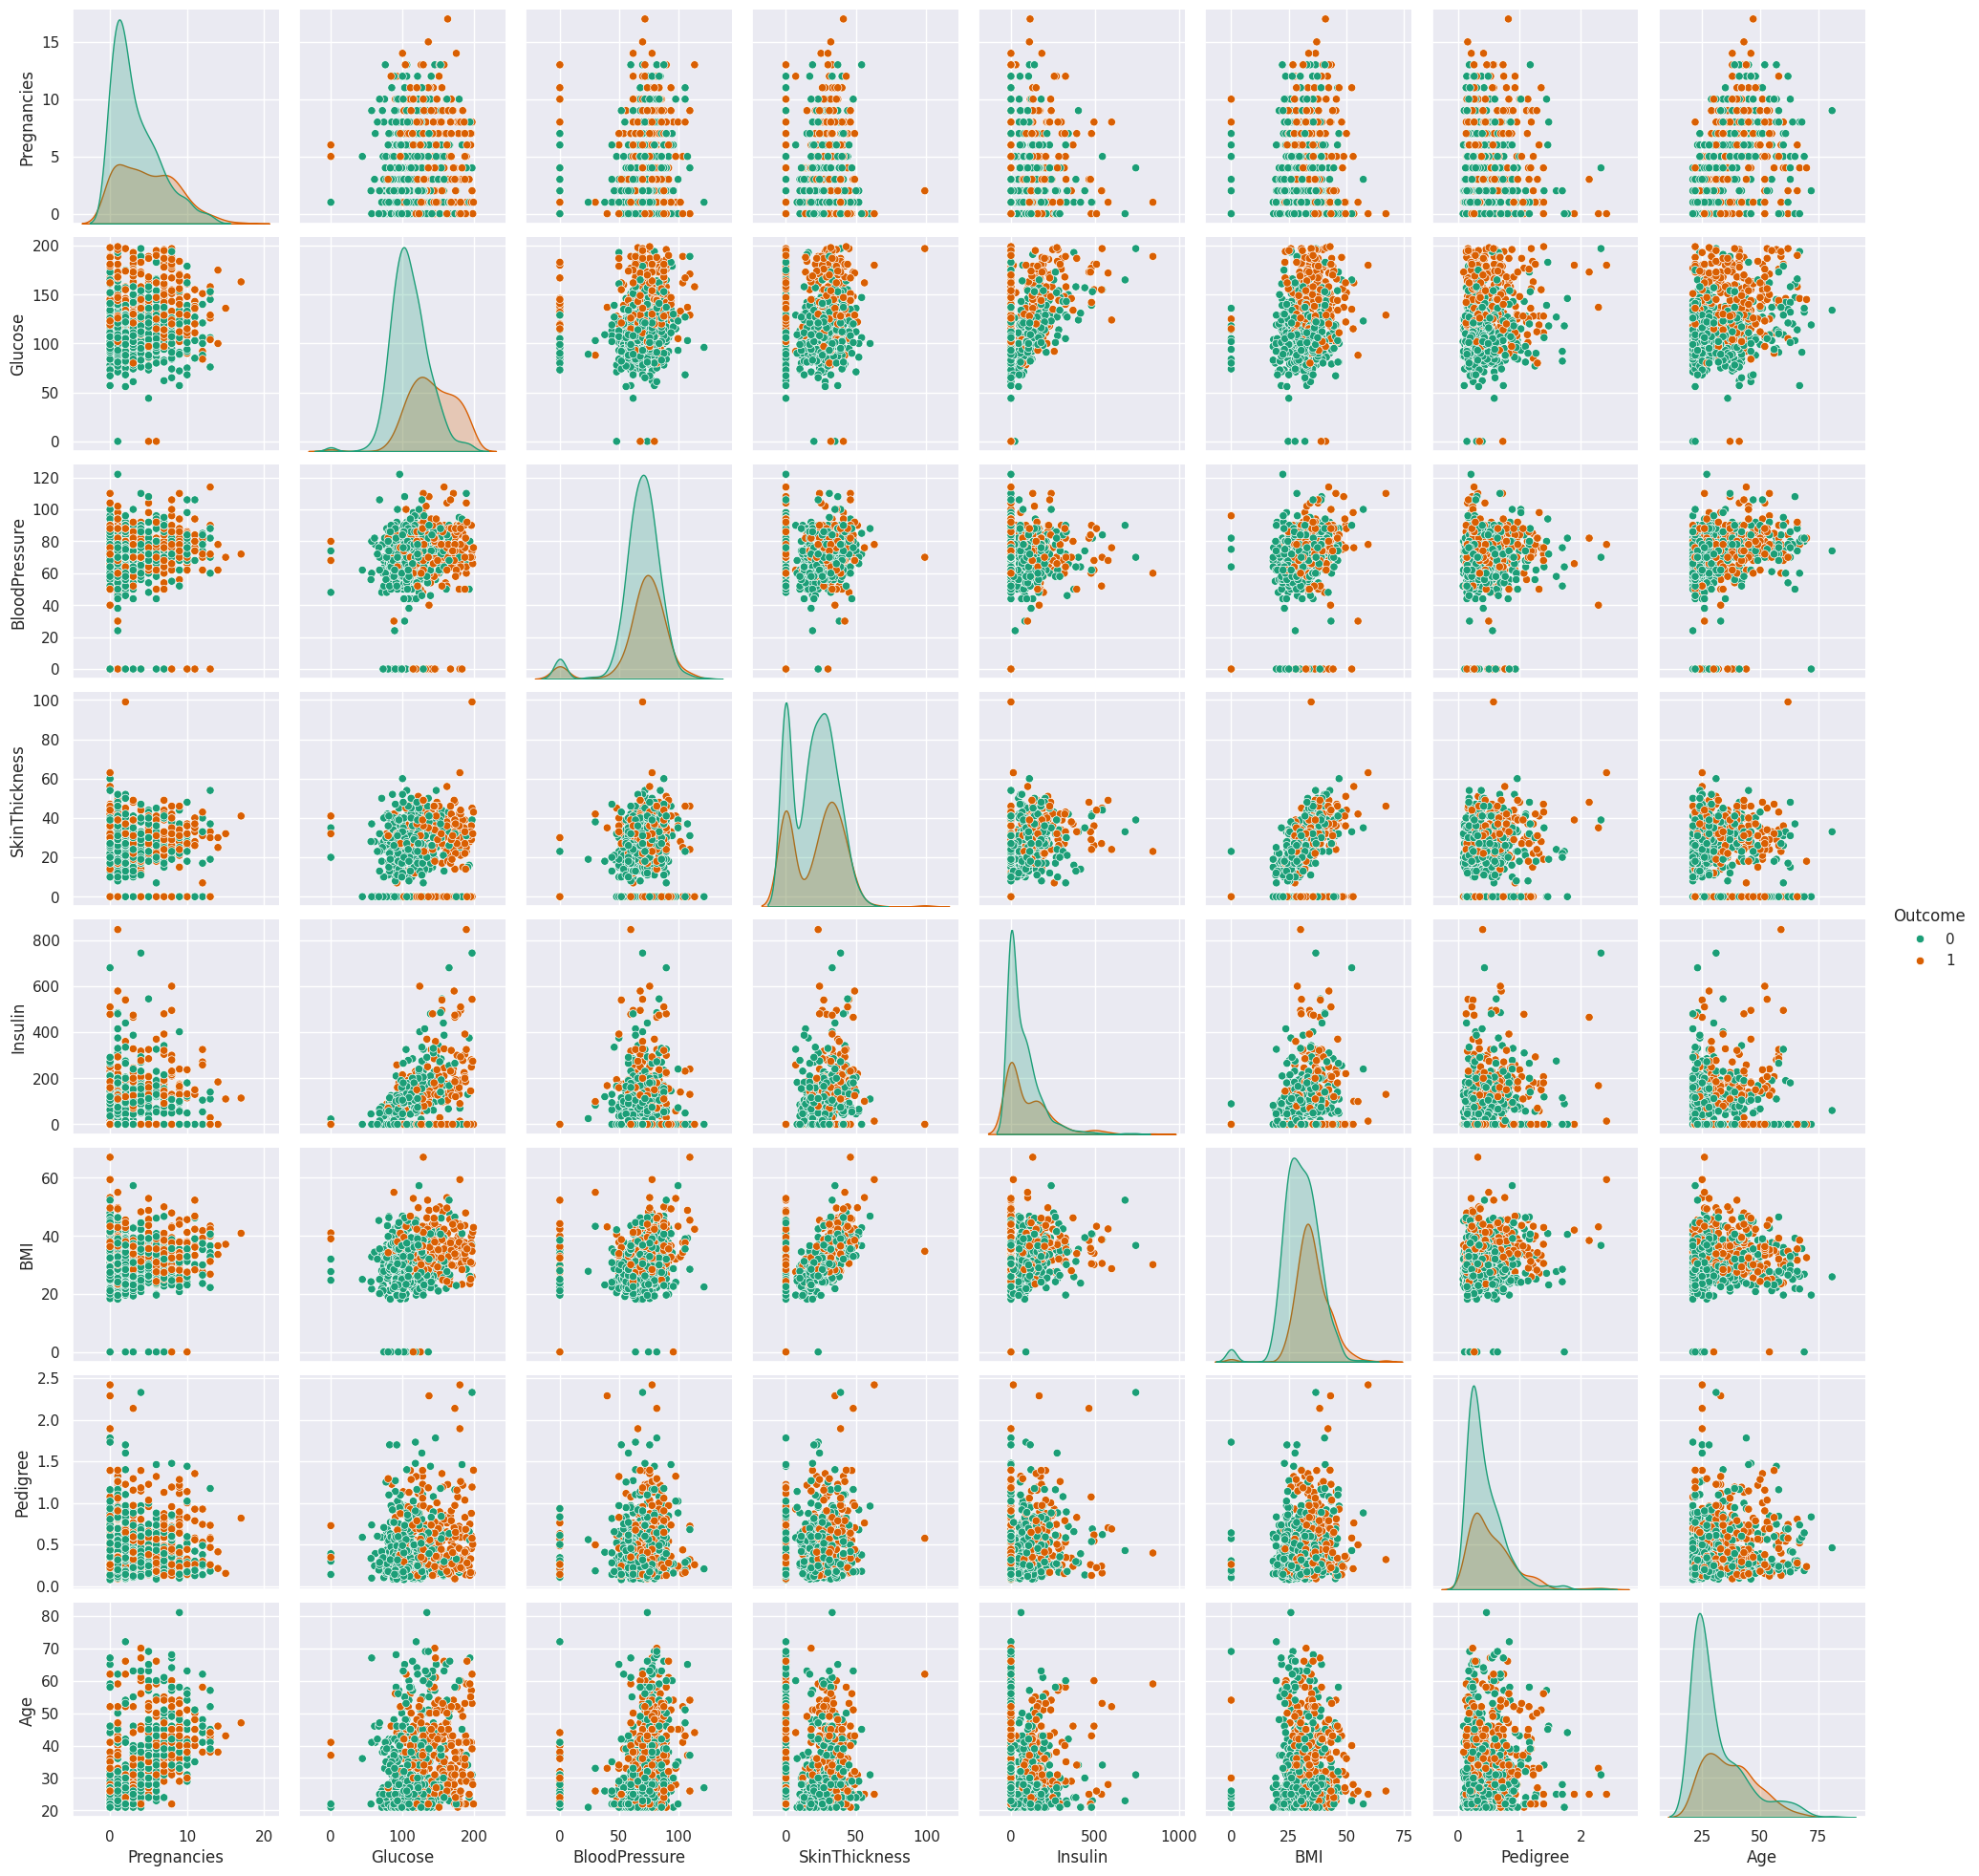

In [12]:
sns.pairplot(df, hue=target, palette="Dark2")

Разделяем выборку на обучающую и тестовую

In [23]:
# Удаление столбца 'target' из DataFrame и создание нового DataFrame 'X'
X = df.drop('Outcome', axis=1)

# Масштабирование (нормализация) данных

# Получение имен всех столбцов в DataFrame 'X'
col_names = X.columns.values

# Определение столбцов для масштабирования: выбираются столбцы, где среднее значение > 20
extra = [col for col in col_names if X[col].mean() > 20]

# Импортирование MinMaxScaler из библиотеки scikit-learn
from sklearn.preprocessing import MinMaxScaler

# Создание экземпляра MinMaxScaler для масштабирования данных в диапазоне от 0 до 10
scaler = MinMaxScaler((0, 10))

# Применение масштабирования к выбранным столбцам
X_scaled = scaler.fit_transform(X[extra])

# Замена исходных значений выбранных столбцов на масштабированные значения
X[extra] = X_scaled

# Определение целевого столбца 'target' из DataFrame 'df'
y = df['Outcome']

# Разделение данных на обучающую и тестовую выборки (70% обучающая, 30% тестовая)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

# Вывод первых 10 строк DataFrame 'X' для проверки
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,6,7.437186,5.901639,3.535354,0.000000,5.007452,0.627,4.833333
1,1,4.271357,5.409836,2.929293,0.000000,3.964232,0.351,1.666667
2,8,9.195980,5.245902,0.000000,0.000000,3.472429,0.672,1.833333
3,1,4.472362,5.409836,2.323232,1.111111,4.187779,0.167,0.000000
4,0,6.884422,3.278689,3.535354,1.985816,6.423249,2.288,2.000000
5,5,5.829146,6.065574,0.000000,0.000000,3.815201,0.201,1.500000
6,3,3.919598,4.098361,3.232323,1.040189,4.619970,0.248,0.833333
7,10,5.778894,0.000000,0.000000,0.000000,5.260805,0.134,1.333333
8,2,9.899497,5.737705,4.545455,6.418440,4.545455,0.158,5.333333
9,8,6.281407,7.868852,0.000000,0.000000,0.000000,0.232,5.500000


PCA (метод главных компонент)

| PC0 - 49.61 | PC1 - 16.37 | PC2 - 10.96 | PC3 - 8.84 | PC4 - 6.31 | PC5 - 4.38 | PC6 - 3.12 | PC7 - 0.39 | 

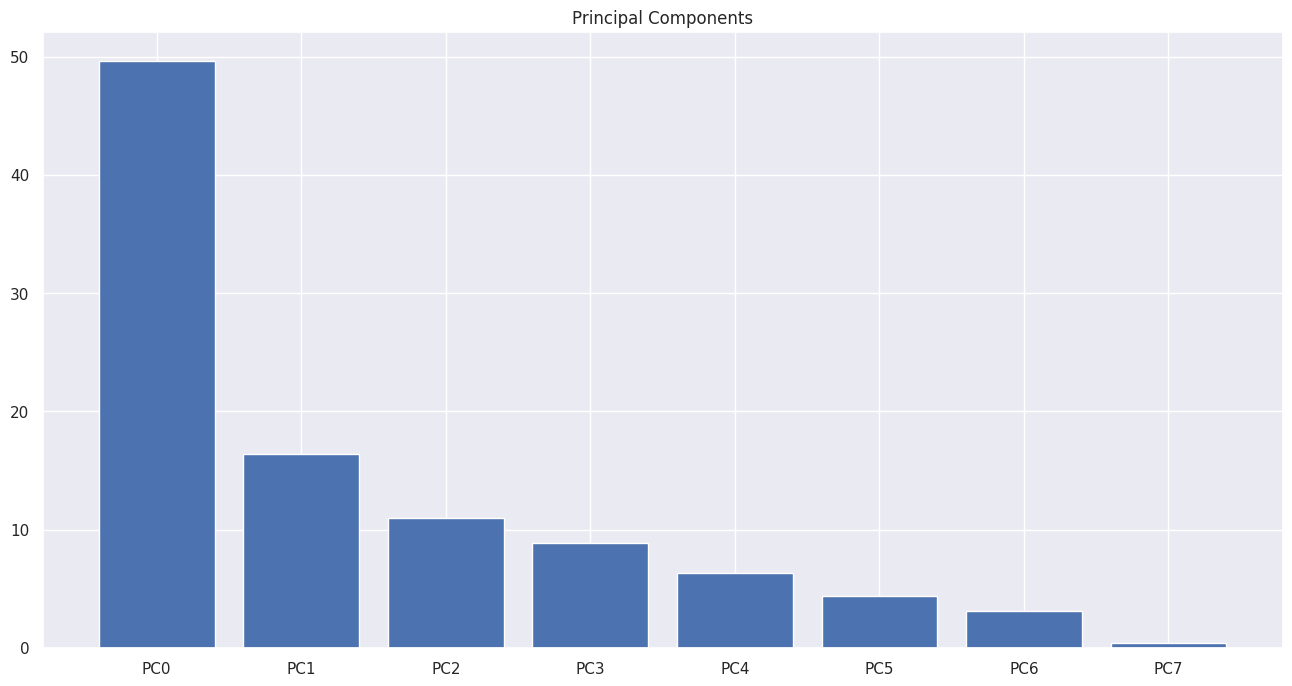

In [24]:
# pca = PCA(n_components=2)
pca = PCA()
X_pca = pca.fit_transform(X)

print("| ", end="")
for i in range(len(pca.explained_variance_ratio_)):
    print(f"PC{i} - {round(pca.explained_variance_ratio_[i] * 100, 2)}", end=" | ")
    
plt.figure(figsize=(16,8))
plt.bar([f"PC{i}" for i in range(len(pca.explained_variance_ratio_))], [round(x * 100, 2) for x in pca.explained_variance_ratio_])
plt.title("Principal Components")
plt.show()

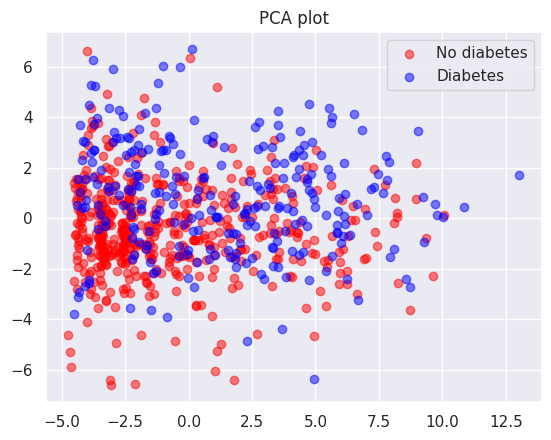

In [28]:
plt.figure()
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='red', alpha=0.5,label='No diabetes')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='blue', alpha=0.5,label='Diabetes')
plt.legend()
plt.title('PCA plot')
plt.show()


### t-SNE

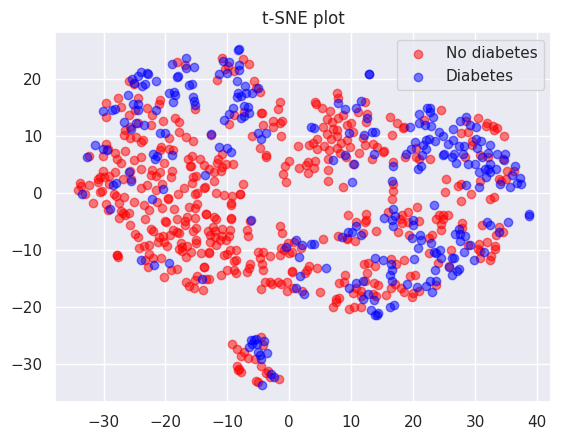

In [29]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure()
plt.scatter(X_tsne[y==0, 0], X_tsne[y==0, 1], color='red', alpha=0.5, label='No diabetes')
plt.scatter(X_tsne[y==1, 0], X_tsne[y==1, 1], color='blue', alpha=0.5, label='Diabetes')
plt.legend()
plt.title('t-SNE plot')
plt.show()

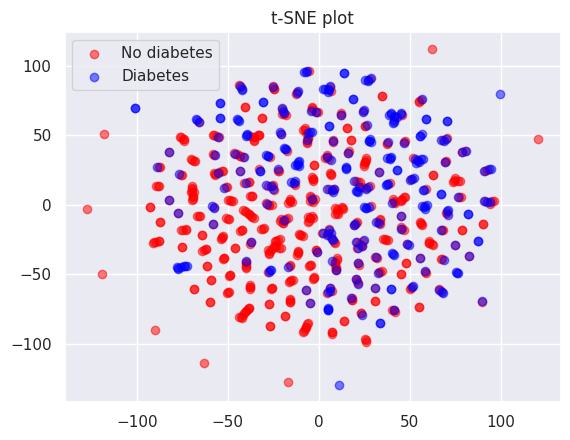

In [31]:
tsne = TSNE(n_components=2, random_state=42,perplexity=1)
X_tsne = tsne.fit_transform(X)

plt.figure()
plt.scatter(X_tsne[y==0, 0], X_tsne[y==0, 1], color='red', alpha=0.5, label='No diabetes')
plt.scatter(X_tsne[y==1, 0], X_tsne[y==1, 1], color='blue', alpha=0.5, label='Diabetes')
plt.legend()
plt.title('t-SNE plot')
plt.show()

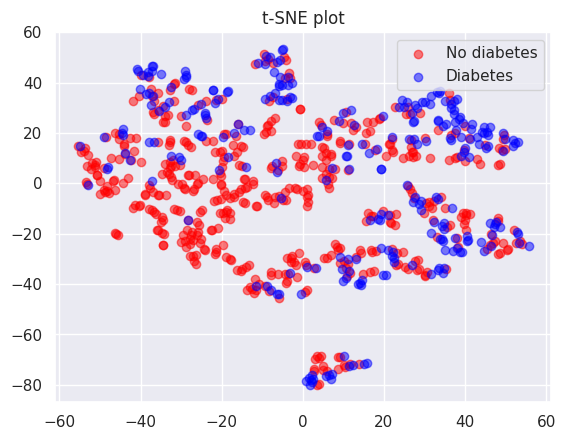

In [32]:
tsne = TSNE(n_components=2, random_state=42,perplexity=10)
X_tsne = tsne.fit_transform(X)

plt.figure()
plt.scatter(X_tsne[y==0, 0], X_tsne[y==0, 1], color='red', alpha=0.5, label='No diabetes')
plt.scatter(X_tsne[y==1, 0], X_tsne[y==1, 1], color='blue', alpha=0.5, label='Diabetes')
plt.legend()
plt.title('t-SNE plot')
plt.show()

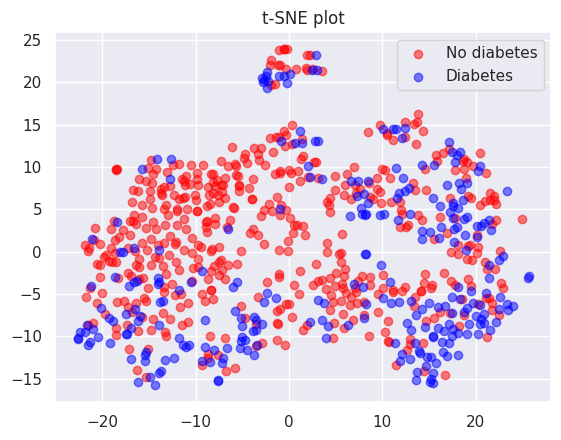

In [33]:
tsne = TSNE(n_components=2, random_state=42,perplexity=50)
X_tsne = tsne.fit_transform(X)

plt.figure()
plt.scatter(X_tsne[y==0, 0], X_tsne[y==0, 1], color='red', alpha=0.5, label='No diabetes')
plt.scatter(X_tsne[y==1, 0], X_tsne[y==1, 1], color='blue', alpha=0.5, label='Diabetes')
plt.legend()
plt.title('t-SNE plot')
plt.show()

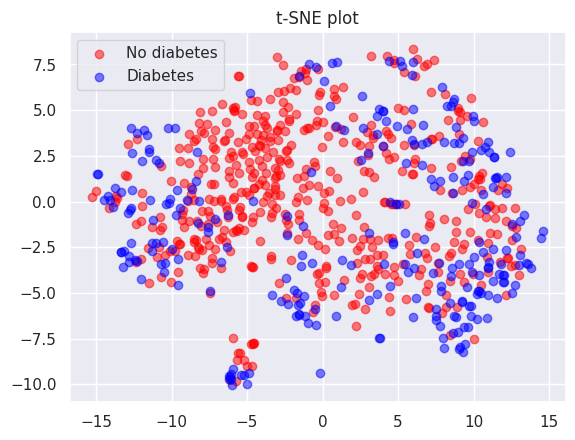

In [34]:
tsne = TSNE(n_components=2, random_state=42,perplexity=100)
X_tsne = tsne.fit_transform(X)

plt.figure()
plt.scatter(X_tsne[y==0, 0], X_tsne[y==0, 1], color='red', alpha=0.5, label='No diabetes')
plt.scatter(X_tsne[y==1, 0], X_tsne[y==1, 1], color='blue', alpha=0.5, label='Diabetes')
plt.legend()
plt.title('t-SNE plot')
plt.show()